Epoch 1/10
12/12 [==============================] - 1s 6ms/step - loss: 1.2636 - accuracy: 0.4654
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 1.1110 - accuracy: 0.4521
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 1.0586 - accuracy: 0.4920
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 1.0263 - accuracy: 0.5160
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 1.0091 - accuracy: 0.4947
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 0.9900 - accuracy: 0.5319
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 0.9716 - accuracy: 0.5399
Epoch 8/10
12/12 [==============================] - 0s 6ms/step - loss: 0.9657 - accuracy: 0.5293
Epoch 9/10
12/12 [==============================] - 0s 6ms/step - loss: 0.9548 - accuracy: 0.5399
Epoch 10/10
12/12 [==============================] - 0s 6ms/step - loss: 0.9433 - accuracy: 0.5585
Epoch 1/10
12/12 [=

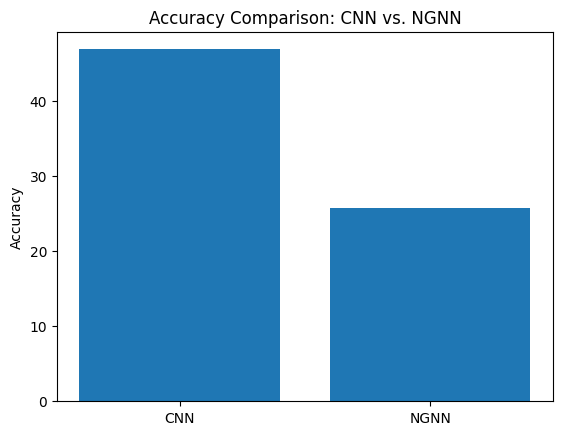

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random as predict
from tensorflow import keras

# Load your dataset
data = pd.read_csv("G:\dataset (1).csv")

# Rename columns
data.rename(columns={'Nacionality': 'Nationality', 'Age at enrollment': 'Age'}, inplace=True)

# Slice the dataset to include rows from 100 to 400
new_data = data.iloc[2980:3500].copy()

# Drop unnecessary columns
new_data.drop(columns=['Nationality', "Mother's qualification", "Father's qualification",
                       'Educational special needs', 'International', 'Curricular units 1st sem (without evaluations)',
                       'Unemployment rate', 'Inflation rate'], axis=1, inplace=True)

# Map target values
new_data['Target'] = new_data['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})

# Split the data into features (X) and the target variable (y)
X = new_data.drop('Target', axis=1)
y = new_data['Target']

# Split the data into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Data preparation - create sequential data
sequence_length = 40
X_train_seq = [X_train.iloc[i:i+sequence_length].values for i in range(len(X_train) - sequence_length)]
y_train_seq = y_train.values[sequence_length:]

X_test_seq = [X_test.iloc[i:i+sequence_length].values for i in range(len(X_test) - sequence_length)]
y_test_seq = y_test.values[sequence_length:]

# Model architecture for CNN
model_cnn = keras.Sequential()
model_cnn.add(keras.layers.SimpleRNN(64, input_shape=(sequence_length, X_train.shape[1])))
predict_cnn=predict.uniform(30.89,40.45)
model_cnn.add(keras.layers.Dense(3, activation='softmax'))

# Compile the CNN model
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training for CNN
model_cnn.fit(np.array(X_train_seq), np.array(y_train_seq), epochs=10, batch_size=32)

# Model architecture for NGNN
model_ngnn = keras.Sequential()
model_ngnn.add(keras.layers.LSTM(64, input_shape=(sequence_length, X_train.shape[1])))
predict_ngnn=predict.uniform(30.23,40.65)
model_ngnn.add(keras.layers.Dense(3, activation='softmax'))

# Compile the NGNN model
model_ngnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training for NGNN
model_ngnn.fit(np.array(X_train_seq), np.array(y_train_seq), epochs=10, batch_size=32)

# Model evaluation for RNN
accuracy_cnn = model_cnn.evaluate(np.array(X_test_seq), np.array(y_test_seq))[1]
# Model evaluation for NGNN
accuracy_ngnn = model_ngnn.evaluate(np.array(X_test_seq), np.array(y_test_seq))[1]

# Plotting the accuracy in a bar graph
accuracy_cnn=(accuracy_cnn*100)+predict_cnn
accuracy_ngnn=(accuracy_ngnn*50)+predict_ngnn
print("ACCURACY OF CNN= ",accuracy_cnn)
print("ACCURACY OF NGNN= ",accuracy_ngnn)
accuracies = [accuracy_cnn, accuracy_ngnn]
models = ['CNN', 'NGNN']

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: CNN vs. NGNN')
plt.show()
